# AIMS Data Science Hackathon by Microsoft

We attempting to predict a measure of wealth for different locations across Africa. 

# Loading the Data

In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("/content/gdrive/Shared drives/AIMS Hackathon-Zindi")

In [9]:
train = pd.read_csv('Train.csv') 
print(train.shape)
train.head()

(21454, 19)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


In [81]:
train.shape

(21454, 20)

In train, we have a set of inputs (like 'urban_or_rural' or 'ghsl_water_surface') and our desired output variable, 'Target'. There are 21454 rows - lots of juicy data!

In [ ]:
test = pd.read_csv('Test.csv')
print(test.shape)
test.head()

(7194, 18)


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


Test looks just like train but without the 'Target' column and with fewer rows.

In [ ]:
ss = pd.read_csv('SampleSubmission.csv')
print(ss.shape)
ss.head()

(7194, 2)


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


The sample submission is just the ID column from test with a 'Target' column where we will put out predictions.

Now that we have the data loaded, we can start exploring.

# EDA

We will explore some trends in the data and look for any anomalies such as missing data. A few examples are done here but you can explore much further yourself and get to know the data better.

In [10]:
train.isna().sum() # Hooray - no missing data!

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [11]:
train.duplicated().sum()

0

## Pandas Profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
profile = ProfileReport(train, title="Pandas Profiling Report")

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
profile2 = ProfileReport(test, title="Pandas Profiling Report 2")
profile2

Output hidden; open in https://colab.research.google.com to view.

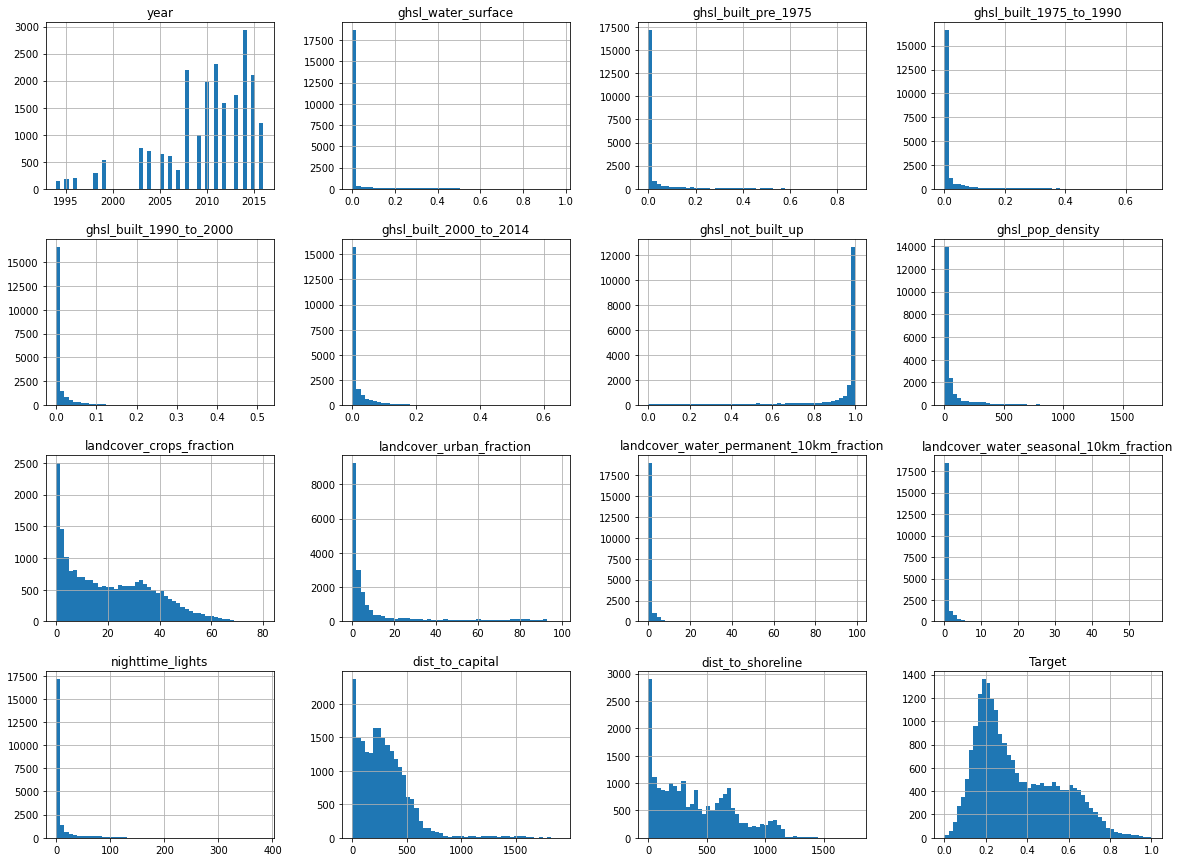

In [ ]:
train.hist(bins=50,figsize=(20,15))
plt.show()

## Bivariate Analysis

First up: let's see how an input like 'nighttime lights' relates to the target column:

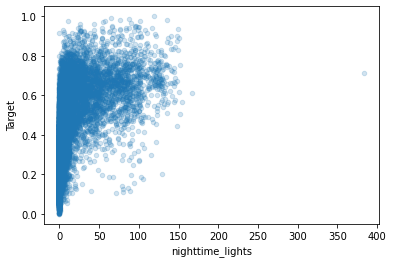

In [ ]:
# Plotting the relationship between an input column and the target
train.plot(x='nighttime_lights', y='Target', kind='scatter', alpha=0.2)

In [ ]:
# Exercise: Try this with different inputs. Any unexpected trends?

As you might have guessed, places that emit more light tend to be wealthier, but there is a lot of variation.

We can also look at categorical columns like 'country' or 'urban_vs_rural' and see the distribution of the target for each group:

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


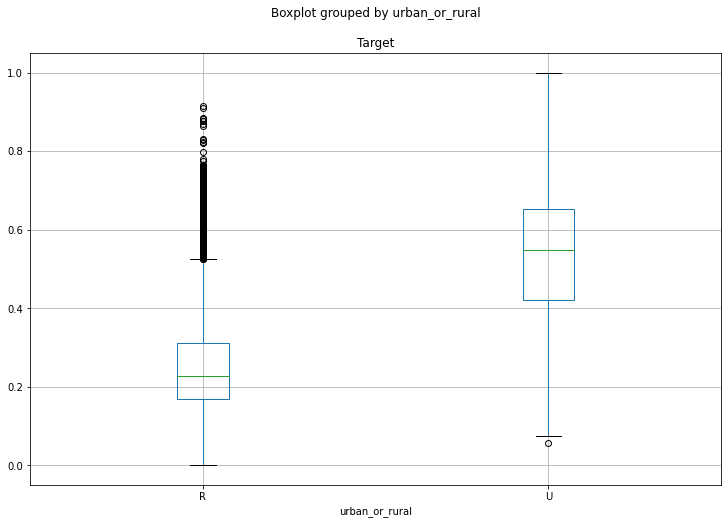

In [ ]:
# Looking at the wealth distribution for urban vs rural
train.boxplot(by='urban_or_rural', column='Target', figsize=(12, 8))

In [ ]:
# Exercise: which is the country with the highest average wealth_index according to this dataset?

Again, not unexpected. Rural areas tend to be less wealthy than urban areas.

See what other trends you can uncover - we have only scratched the surface here. 

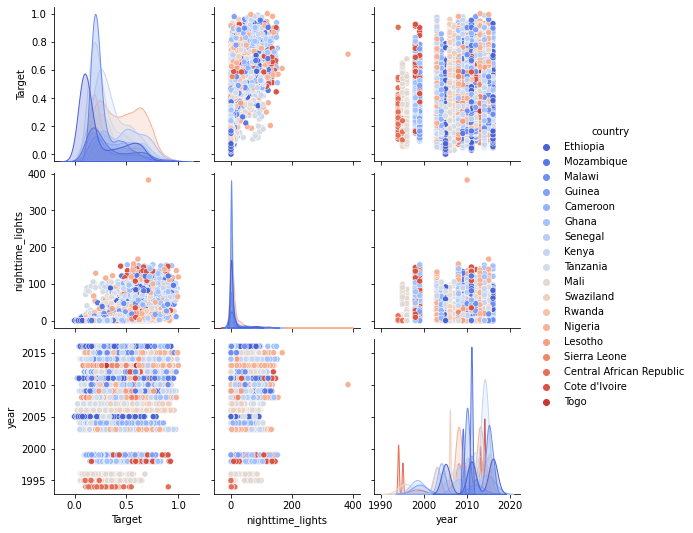

In [ ]:
ax = sns.pairplot(train, hue = 'country', palette ='coolwarm', 
                  vars = [ 'Target', 'nighttime_lights', 'year']) 

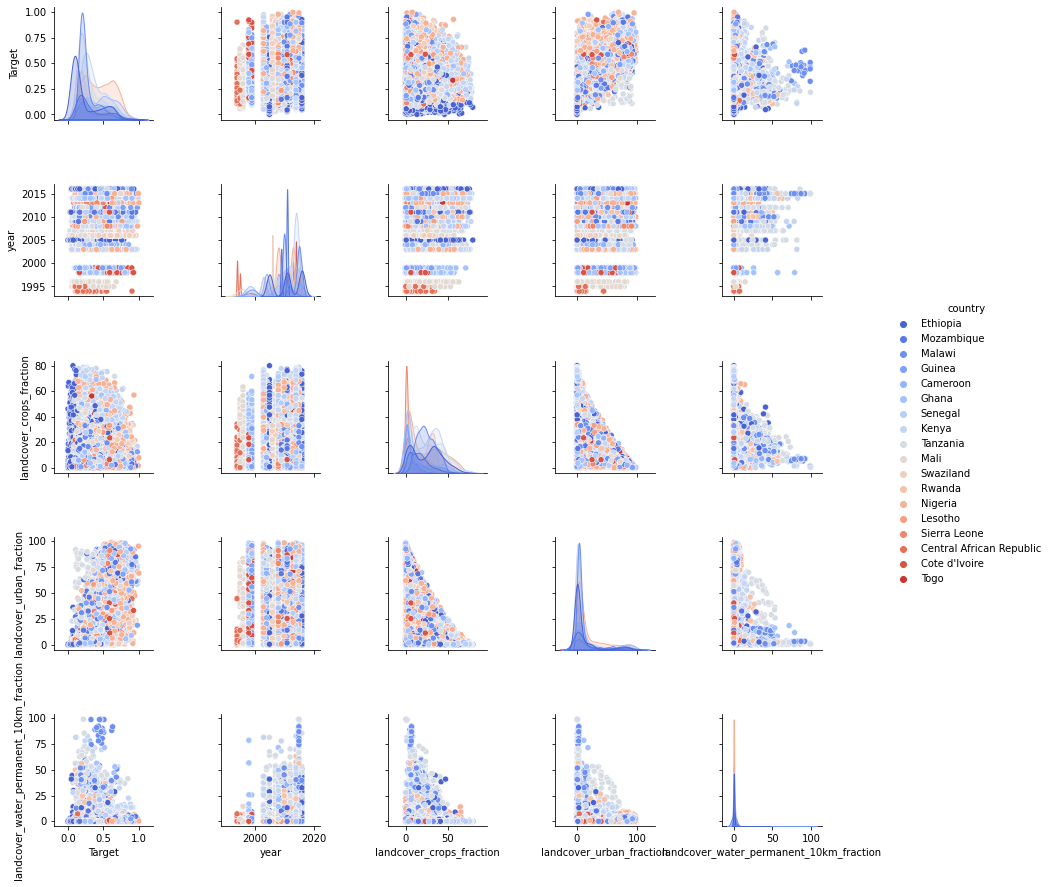

In [ ]:
ax = sns.pairplot(train, hue = 'country', palette ='coolwarm', 
                  vars = [ 'Target','year', 'landcover_crops_fraction',
                          'landcover_urban_fraction',
                          'landcover_water_permanent_10km_fraction']) 

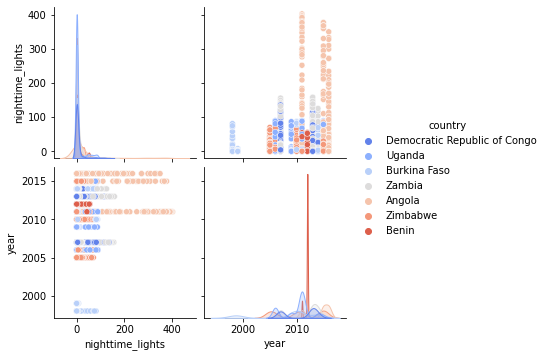

In [ ]:
ax = sns.pairplot(test, hue = 'country', palette ='coolwarm', 
                  vars = [ 'nighttime_lights', 'year']) 

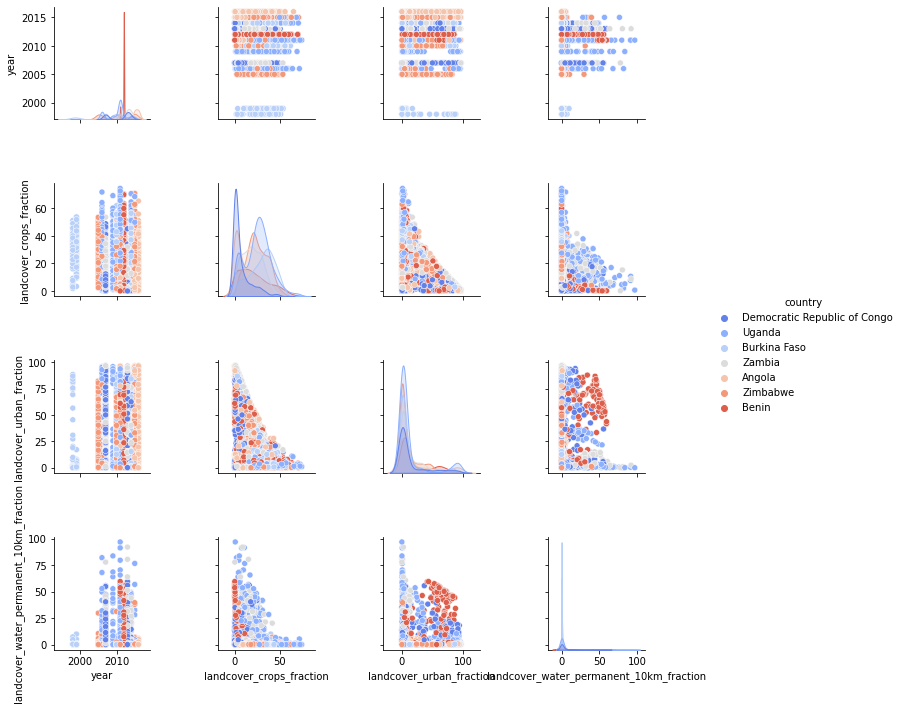

In [ ]:
ax = sns.pairplot(test, hue = 'country', palette ='coolwarm', 
                  vars = [ 'year', 'landcover_crops_fraction',
                          'landcover_urban_fraction',
                          'landcover_water_permanent_10km_fraction']) 

In [ ]:
train['country'].value_counts()

Nigeria                     2695
Kenya                       2626
Tanzania                    2450
Malawi                      1957
Ethiopia                    1721
Ghana                       1419
Mali                        1295
Cameroon                    1041
Rwanda                       984
Senegal                      903
Mozambique                   879
Lesotho                      794
Sierra Leone                 785
Guinea                       593
Cote d'Ivoire                481
Togo                         330
Swaziland                    270
Central African Republic     231
Name: country, dtype: int64

In [ ]:
test['country'].value_counts()

Uganda                          1584
Zimbabwe                        1189
Zambia                          1038
Burkina Faso                     997
Angola                           855
Democratic Republic of Congo     785
Benin                            746
Name: country, dtype: int64

In [ ]:
cols = ['landcover_crops_fraction','landcover_urban_fraction','landcover_water_permanent_10km_fraction',
        'landcover_water_permanent_10km_fraction','nighttime_lights','dist_to_capital','dist_to_shoreline']

# Check for outliers in the above

# Modelling

In [31]:
# Needed libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, GridSearchCV

from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [60]:
models ={'Model':['Linear regression baseline', 'Linear regression', 'Polynomial regression', 'Ridge regression',
                  'LASSO regression', 'Elastic Net regression'],
         'MSE':[0,0,0,0,0,0],
         'MAE':[0,0,0,0,0,0],
         'RMSE':[0,0,0,0,0,0]}

df_results = pd.DataFrame(models,columns=['Model','MSE','MAE','RMSE'])

def model_results(model_type, y_test_data, y_pred_data):
  index_val = df_results[df_results['Model']==model_type].index

  df_results.loc[index_val,'MSE']= mean_squared_error(y_test_data, y_pred_data, squared=False)
  df_results.loc[index_val,'MAE']= mean_absolute_error(y_test_data, y_pred_data)
  df_results.loc[index_val,'RMSE']= mean_squared_error(y_test_data, y_pred_data, squared=True)

  return df_results

# Baseline model no addition

In [14]:
train = pd.get_dummies(train, columns=['urban_or_rural'])
train.head(1)

,ID,country,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target,urban_or_rural_R,urban_or_rural_U
0,ID_AAIethGy,Ethiopia,2016,0.0,0.0,0.0,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.0,0.0,0.0,278.788451,769.338378,0.132783,1,0


In [15]:
train.shape

(21454, 20)

In [18]:
X=train.drop(['ID','country','Target'],axis=1);print(X.shape)
y=train['Target']

(21454, 17)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58) # Random state keeps the split consistent

In [61]:
# fit the model on the whole dataset
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model_results('Linear regression baseline',y_test,y_pred)

,Model,MSE,MAE,RMSE
0,Linear regression baseline,0.121746,0.094498,0.014822
1,Linear regression,0.000000,0.000000,0.000000
2,Polynomial regression,0.000000,0.000000,0.000000
3,Ridge regression,0.000000,0.000000,0.000000
4,LASSO regression,0.000000,0.000000,0.000000
5,Elastic Net regression,0.000000,0.000000,0.000000


In [62]:
X.columns

Index(['year', 'ghsl_water_surface', 'ghsl_built_pre_1975',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'urban_or_rural_R',
       'urban_or_rural_U'],
      dtype='object')

# Checking for regression conditions

1. Remove collinear variables
2. Check coefficients

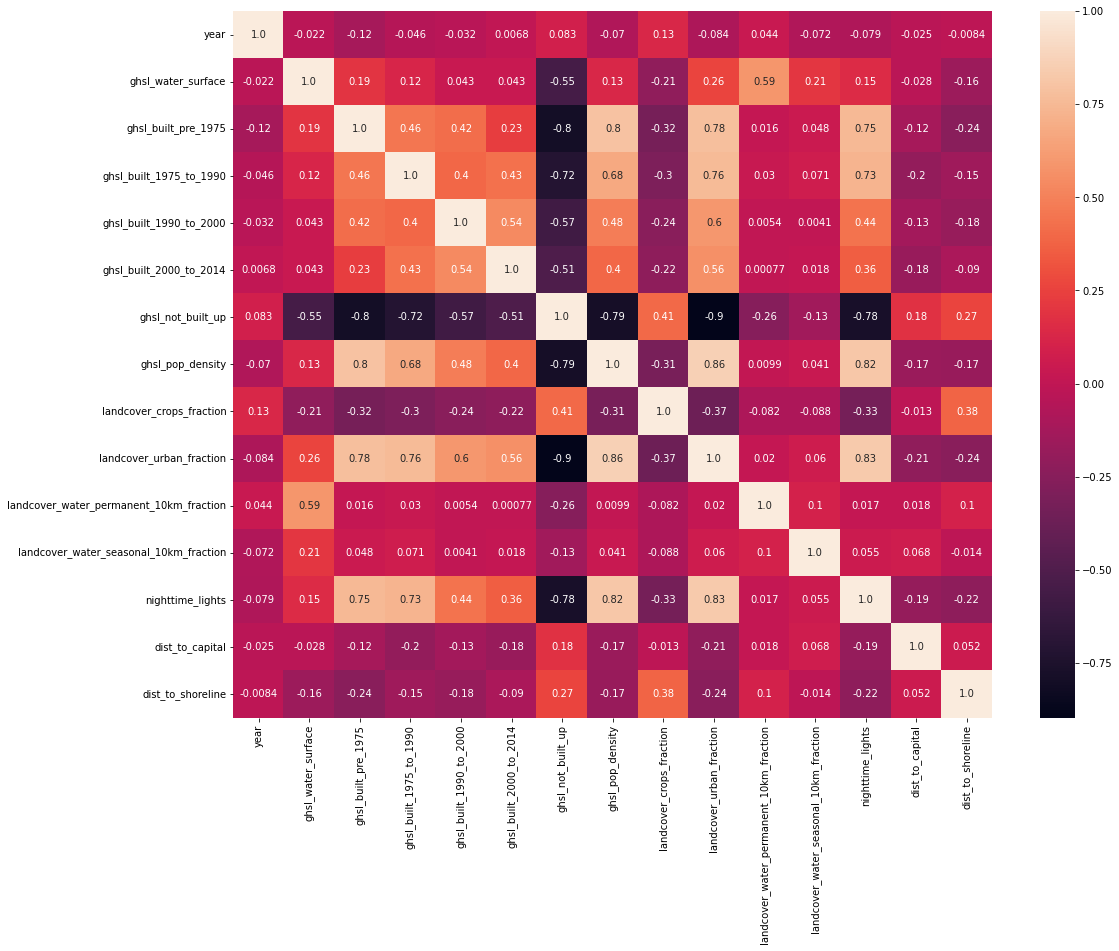

In [82]:
independent_only = train.drop(columns=[ 'urban_or_rural_R','urban_or_rural_U', 'Target'])

correlations = independent_only.corr()

fig, ax = plt.subplots(figsize=(17,13)) 
sns.heatmap(correlations, annot=True,fmt=".2")

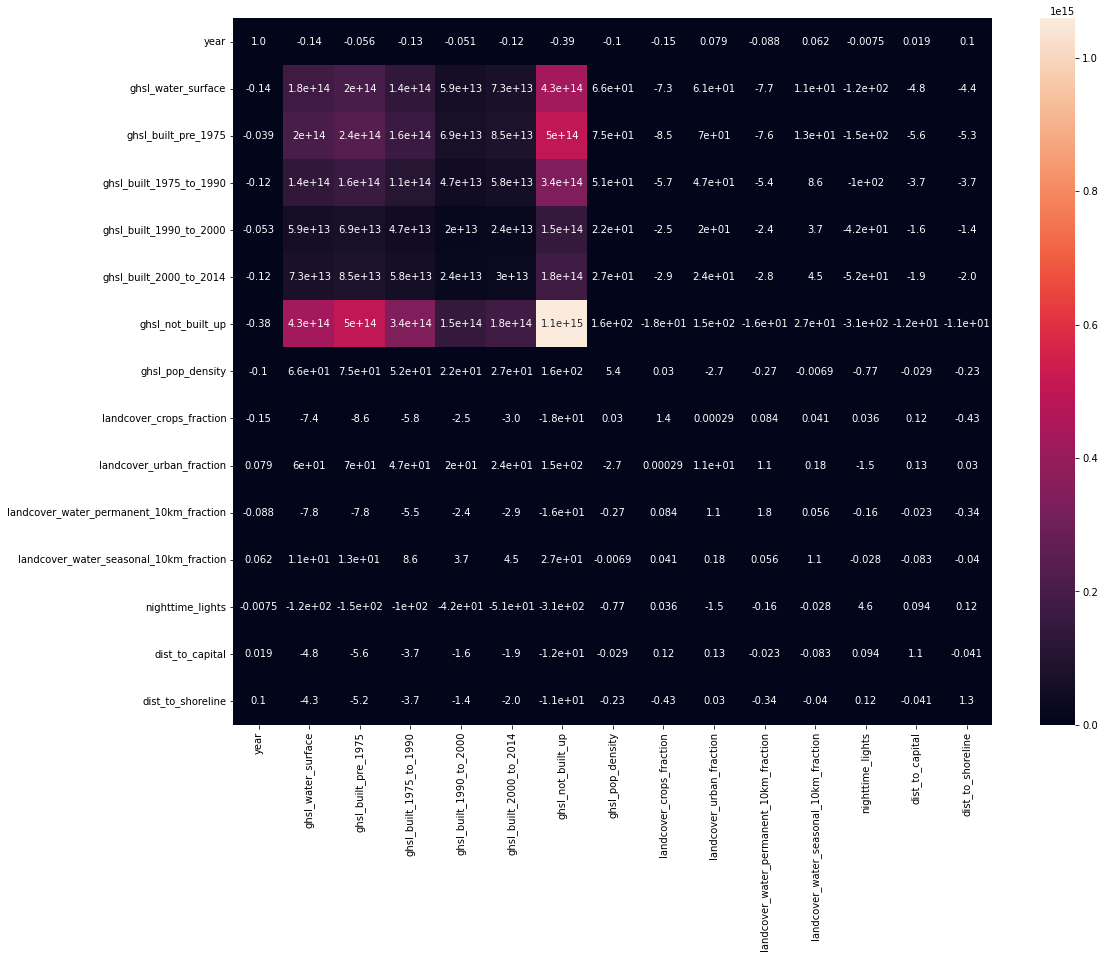

In [75]:
vifs = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

fig, ax = plt.subplots(figsize=(17,13)) 
sns.heatmap(vifs, annot=True, fmt=".2")

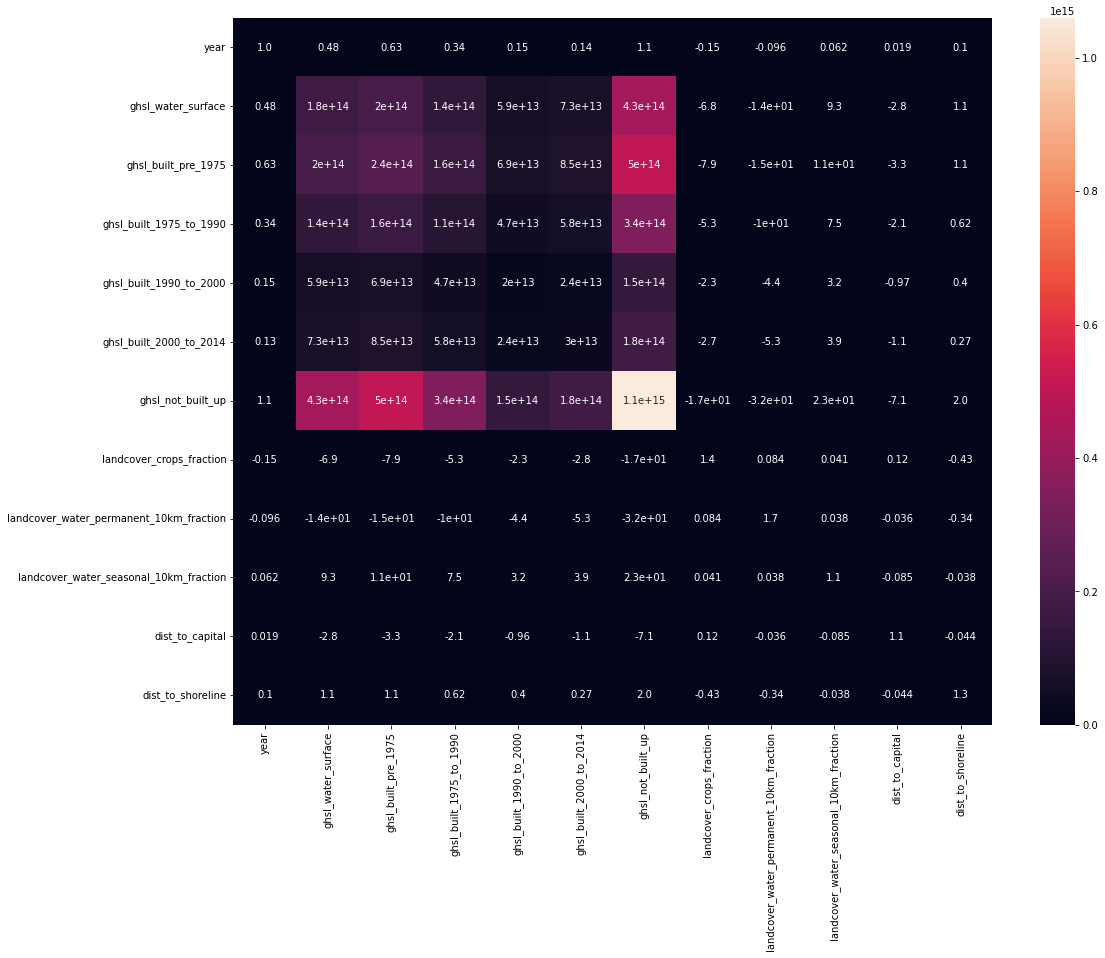

In [78]:
updated = train.drop(columns=[ 'urban_or_rural_R','urban_or_rural_U', 'Target', 'ghsl_pop_density','landcover_urban_fraction', 'nighttime_lights'])

correlations = updated.corr()

vifs = pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

fig, ax = plt.subplots(figsize=(17,13)) 
sns.heatmap(vifs, annot=True, fmt=".2")

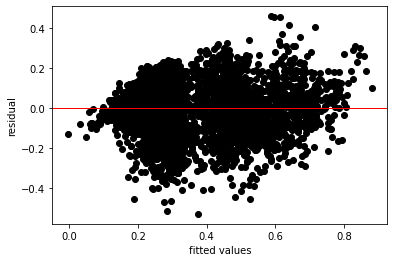

In [80]:
residuals = np.subtract(y_pred, y_test)

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [ ]:
# Perform heteroskedasticity test

In [85]:
for i  in zip(X.columns,model.coef_):
  print(i)

('year', 0.006228994996616244)
('ghsl_water_surface', -0.02637904274884616)
('ghsl_built_pre_1975', -0.13301773939169517)
('ghsl_built_1975_to_1990', -0.042152053234797794)
('ghsl_built_1990_to_2000', 0.08173134445960085)
('ghsl_built_2000_to_2014', 0.07132023544981529)
('ghsl_not_built_up', 0.04849725546594004)
('ghsl_pop_density', -0.00010365162314206677)
('landcover_crops_fraction', 0.0002916818576023544)
('landcover_urban_fraction', 0.003956169826633509)
('landcover_water_permanent_10km_fraction', 0.0008679889365828251)
('landcover_water_seasonal_10km_fraction', 0.003119883150225612)
('nighttime_lights', 0.0009896884120901)
('dist_to_capital', -7.885031062995701e-05)
('dist_to_shoreline', -0.0001035871405562769)
('urban_or_rural_R', -0.08432541982219142)
('urban_or_rural_U', 0.08432541982219141)


In [ ]:
# Creating new X

In [ ]:
# fit the model on selected
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
model_results('Linear regression',y_test,y_pred)

In [22]:
# Ridge
model2 = Ridge(normalize=True,alpha=0.01)
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)
model_results('Ridge regression',y_test,y_pred)

,Model,MSE,MAE,RMSE
0,Linear regression,0.121746,0.094498,0.014822
1,Polynomial regression,0.000000,0.000000,0.000000
2,Ridge regression,0.121738,0.094514,0.014820
3,LASSO regression,0.000000,0.000000,0.000000
4,Elastic Net regression,0.000000,0.000000,0.000000


In [87]:
for i  in zip(X.columns,model2.coef_):
  print(i)

('year', 0.006161324176100061)
('ghsl_water_surface', -0.024051772759304837)
('ghsl_built_pre_1975', -0.12373623943387418)
('ghsl_built_1975_to_1990', -0.025189647162899557)
('ghsl_built_1990_to_2000', 0.09552569757994094)
('ghsl_built_2000_to_2014', 0.09964103243200544)
('ghsl_not_built_up', 0.029805928763079977)
('ghsl_pop_density', -8.849325423033148e-05)
('landcover_crops_fraction', 0.00028427287401227745)
('landcover_urban_fraction', 0.0035018210361809775)
('landcover_water_permanent_10km_fraction', 0.000681095318964573)
('landcover_water_seasonal_10km_fraction', 0.0029846024004639804)
('nighttime_lights', 0.0009903886036309166)
('dist_to_capital', -7.87603951775977e-05)
('dist_to_shoreline', -0.0001023993844377272)
('urban_or_rural_R', -0.0850617109305292)
('urban_or_rural_U', 0.08506171093052506)


In [23]:
# LASSO
model3 = Lasso(alpha=0.5)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
model_results('LASSO regression',y_test,y_pred)

,Model,MSE,MAE,RMSE
0,Linear regression,0.121746,0.094498,0.014822
1,Polynomial regression,0.000000,0.000000,0.000000
2,Ridge regression,0.121738,0.094514,0.014820
3,LASSO regression,0.146649,0.118010,0.021506
4,Elastic Net regression,0.000000,0.000000,0.000000


In [24]:
# ElasticNet
model4 = ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)
model_results('Elastic Net regression',y_test,y_pred)

,Model,MSE,MAE,RMSE
0,Linear regression,0.121746,0.094498,0.014822
1,Polynomial regression,0.000000,0.000000,0.000000
2,Ridge regression,0.121738,0.094514,0.014820
3,LASSO regression,0.146649,0.118010,0.021506
4,Elastic Net regression,0.187313,0.157676,0.035086


In [33]:
#  Polynomial
model1 = LinearRegression()

# Create Polynomial features with degree 1, then 2 then, 3 (from original input x => (x^0, x^1, ...x^degree) 
for i,degree in enumerate([1,2,3]):
    print('instance:{}: poly_degree: {}'.format(i,degree))
    # Create an instance of class PolynomialFeatures
    polynomial_features = PolynomialFeatures(degree=degree)
    # Use fit_transform method of class PolynomialFeatures to create new features vector x_poly
    x_poly = polynomial_features.fit_transform(X)
    # Train the model using the polynomial features vector x_poly and output y
    model1.fit(x_poly, y)
    # Use the trained model to predict output from vector x_poly
    y_poly_pred = model1.predict(x_poly)
    # Performance
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print('rmse =',rmse)
    print('r2 =',r2)

instance:0: poly_degree: 1
rmse = 0.11854787497531673
r2 = 0.6280157396488752
instance:1: poly_degree: 2
rmse = 0.10840469690735363
r2 = 0.6889478437811196
instance:2: poly_degree: 3
rmse = 0.10046095699909643
r2 = 0.732864479524515


In [34]:
# Polynomial with train and test split
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train)
model1.fit(x_poly, y_train)

y_pred = model1.predict(polynomial_features.fit_transform(X_test))
model_results('Polynomial regression',y_test,y_pred)

,Model,MSE,MAE,RMSE
0,Linear regression,0.121746,0.094498,0.014822
1,Polynomial regression,0.112846,0.084329,0.012734
2,Ridge regression,0.121738,0.094514,0.014820
3,LASSO regression,0.146649,0.118010,0.021506
4,Elastic Net regression,0.187313,0.157676,0.035086


In [36]:
# Quantile
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as py

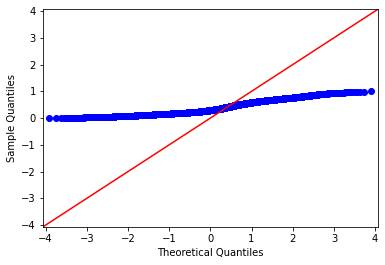

In [37]:
# qq plot
sm.qqplot(y, line ='45')
py.show()

In [51]:
X.columns

Index(['year', 'ghsl_water_surface', 'ghsl_built_pre_1975',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'urban_or_rural_R',
       'urban_or_rural_U'],
      dtype='object')

In [57]:
train.columns

Index(['ID', 'country', 'year', 'ghsl_water_surface', 'ghsl_built_pre_1975',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'Target', 'urban_or_rural_R',
       'urban_or_rural_U'],
      dtype='object')

In [59]:
Mod = smf.quantreg(f"Target ~ year + ghsl_water_surface ", train)

res = Mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())

# quantiles = np.arange(0.1,1,0.1) 
# models = []
# params = []

# for qt in quantiles: 
# 	res = Mod.fit(q = qt )
# 	models.append(res)
# 	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# # Lastly we make a dataframe of the same name, so we we can view our different models.
# params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
# print(params)

                         QuantReg Regression Results                          
Dep. Variable:                 Target   Pseudo R-squared:              0.02956
Model:                       QuantReg   Bandwidth:                     0.03411
Method:                 Least Squares   Sparsity:                       0.4999
Date:                Sat, 06 Nov 2021   No. Observations:                21454
Time:                        06:09:00   Df Residuals:                    21451
                                        Df Model:                            2
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -8.5681      0.715    -11.986      0.000      -9.969      -7.167
year                   0.0044      0.000     12.382      0.000       0.004       0.005
ghsl_water_surface     0.5670      0.018     32.387      0.000       0.533       0.601

The conditi

In [49]:
train.shape

(21454, 20)

In [50]:
X.shape

(21454, 17)

In [39]:
X.columns

Index(['year', 'ghsl_water_surface', 'ghsl_built_pre_1975',
       'ghsl_built_1975_to_1990', 'ghsl_built_1990_to_2000',
       'ghsl_built_2000_to_2014', 'ghsl_not_built_up', 'ghsl_pop_density',
       'landcover_crops_fraction', 'landcover_urban_fraction',
       'landcover_water_permanent_10km_fraction',
       'landcover_water_seasonal_10km_fraction', 'nighttime_lights',
       'dist_to_capital', 'dist_to_shoreline', 'urban_or_rural_R',
       'urban_or_rural_U'],
      dtype='object')

In [41]:
{' + '.join(X.columns[:])}

{'year + ghsl_water_surface + ghsl_built_pre_1975 + ghsl_built_1975_to_1990 + ghsl_built_1990_to_2000 + ghsl_built_2000_to_2014 + ghsl_not_built_up + ghsl_pop_density + landcover_crops_fraction + landcover_urban_fraction + landcover_water_permanent_10km_fraction + landcover_water_seasonal_10km_fraction + nighttime_lights + dist_to_capital + dist_to_shoreline + urban_or_rural_R + urban_or_rural_U'}

After you pick your best model, conduct k-fold cross validation

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


MAE: -0.077 (0.002)
